In [1]:
import random
import matplotlib.pyplot as plt
import statistics

def initialize(malePopSize, femalePopSize, minDieOut, maxDieOut, alleleDistribution=0.5):
    maleP=[]
    femaleP=[]
    
    
    geneChoice=['a','A']
    #male generate
    for i in range(malePopSize):
        individual=[]
        g=random.choices(geneChoice,[alleleDistribution,1-alleleDistribution])[0]
        individual.append(g)
        #g=random.choice(geneChoice)##comment out if the initial is same allele
        individual.append(g) #append twice
        individual.append(random.randint(minDieOut,maxDieOut))# this will be the third index of each individual, and it is the life time of this individual
        
        maleP.append(individual)
    #female generate    
    for i in range(femalePopSize):
        individual=[]
        g=random.choices(geneChoice,[alleleDistribution,1-alleleDistribution])[0]
        individual.append(g)
        #g=random.choice(geneChoice)##comment out if the initial is same allele
        individual.append(g) #append twice
        individual.append(random.randint(minDieOut,maxDieOut))# this will be the third index of each individual, and it is the life time of this individual
        
        femaleP.append(individual)
    return maleP,femaleP

def crossover(malePop, femalePop, minDieOut, maxDieOut, crossoverTime=1000,):
    crossoverMale=random.choices(malePop,k=crossoverTime)
    crossoverFemale=random.choices(femalePop,k=crossoverTime)
    
    malenewGeneration=[]
    femalenewGeneration=[]
    
    for i in range(crossoverTime):
        newIndividual=[]
        
        #choice gene from male
        indexChoice=random.choice([0,1])
        newIndividual.append(crossoverMale[i][indexChoice])
        
        #choice gene from female
        indexChoice=random.choice([0,1])
        newIndividual.append(crossoverFemale[i][indexChoice])
        
        newIndividual.append(random.randint(minDieOut,maxDieOut))
        
        if(random.choice([0,1]) == 0):
            malenewGeneration.append(newIndividual)
        else:
            femalenewGeneration.append(newIndividual)
    return malenewGeneration,femalenewGeneration

def dieOut(malePop, femalePop):  
    i=0
    while i <len(malePop):
        malePop[i][2]-=1
        
        if malePop[i][2]<=0:  
            malePop.remove(malePop[i])
            continue
            
        i+=1
        
    i=0
    while i <len(femalePop):
        femalePop[i][2]-=1
        
        if femalePop[i][2]<=0:  
            femalePop.remove(femalePop[i])
            continue
            
        i+=1
    
    print("old population after die out: ",len(malePop)+len(femalePop))
    return malePop,femalePop



def checkDistribution(malePop, femalePop):
    aa=0
    Aa=0
    AA=0
    
    for individual in malePop:
        if individual[0]=='a' and individual[1]=='a':
            aa+=1
        elif individual[0]=='a' and individual[1]=='A':
            Aa+=1
        elif individual[0]=='A' and individual[1]=='a':   
            Aa+=1
        else:
            AA+=1
    for individual in femalePop:
        if individual[0]=='a' and individual[1]=='a':
            aa+=1
        elif individual[0]=='a' and individual[1]=='A':
            Aa+=1
        elif individual[0]=='A' and individual[1]=='a':   
            Aa+=1
        else:
            AA+=1
            
    return aa,Aa,AA



# malePopSize=10000
# femalePopSize=100

# minDieOut=5
# maxDieOut=10

# minCrRate=0.1
# maxCrRate=0.25

# iterationNumber=10

def simulationMain(alleleDistribution=0.5, malePopSize=10000, femalePopSize=100, minDieOut=5, maxDieOut=10, minCrRate=0.1, maxCrRate=0.25, iterationNumber=10, isPlot=True):
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("The parameters for this simulation(allele distribution, malePop, femalePop, minDieOut, maxDieOut, minCrossover, maxCrossover, Iteration number, isPlot):\n",alleleDistribution,malePopSize, femalePopSize, minDieOut, maxDieOut, minCrRate, maxCrRate, iterationNumber, isPlot)
    print("---------------------------------------------------------------------------------------------")
    malePop=[]
    femalePop=[]
    
    aaRecord=[]
    AaRecord=[]
    AARecord=[]

    malePop,femalePop=initialize(malePopSize,femalePopSize,minDieOut,maxDieOut ,alleleDistribution)

    aa,Aa,AA=checkDistribution(malePop, femalePop)
    aaRecord.append(aa)
    AaRecord.append(Aa)
    AARecord.append(AA)

    print("This is start genetic distribution:",aa,Aa,AA)
    print("This is start population distribution (male/female):",len(malePop),len(femalePop))

    for iteration in range(iterationNumber):
        print("This is iteration",iteration)
        print("start population for this round: ",len(malePop)+len(femalePop))


        currTotal=len(malePop)+len(femalePop)
        newMalePop,newFemalePop=crossover(malePop,femalePop,minDieOut,maxDieOut,random.randint(int(currTotal*minCrRate),int(currTotal*maxCrRate))) #we want the crossover rate between a percent of total populations

        malePop,femalePop=dieOut(malePop,femalePop)

        malePop.extend(newMalePop)
        femalePop.extend(newFemalePop)
    #     malePop=newMalePop
    #     femalePop=newFemalePop
        print("end population for this round: ",len(malePop)+len(femalePop))

        aa,Aa,AA=checkDistribution(malePop, femalePop)
        aaRecord.append(aa)
        AaRecord.append(Aa)
        AARecord.append(AA)
        print("Distribution for current iteration:",aa,Aa,AA)
        print("Population for current iteration (male/female):",len(malePop),len(femalePop))
        print("'============'================'=============='============='============='")

    aa,Aa,AA=checkDistribution(malePop, femalePop)

    print("Final Distribution after",iterationNumber,"iterations: ",aa,Aa,AA)
    print("Final Frequency after",iterationNumber,"iterations: ",aa/(aa+Aa+AA),Aa/(aa+Aa+AA),AA/(aa+Aa+AA))
    print("Final Distribution for a and A: ",2*aa+Aa,Aa+2*AA)
    print("Final Frequency for a and A: ",(2*aa+Aa)/((aa+Aa+AA)*2),(Aa+2*AA)/((aa+Aa+AA)*2))
    print("Final male and female population: ",len(malePop),len(femalePop))
    
    if isPlot:
        plt.figure(1)
        plt.bar(['aa','Aa','AA'],[aa,Aa,AA])
        plt.figure(2)
        plt.plot(aaRecord)
        plt.plot(AaRecord)
        plt.plot(AARecord)
        plt.show()
    
    return aa, Aa, AA
    #print("verification for random pick: ", random.choices([0,1,2],k=9))#to verify if there is a replacement

############################################################################
THIS IS REPEAT: 0
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
The parameters for this simulation(allele distribution, malePop, femalePop, minDieOut, maxDieOut, minCrossover, maxCrossover, Iteration number, isPlot):
 0.23740078106077733 7432 6176 2 3 0.33033991373038896 0.7115259921974801 5 False
---------------------------------------------------------------------------------------------
This is start genetic distribution: 3124 0 10484
This is start population distribution (male/female): 7432 6176
This is iteration 0
start population for this round:  13608
old population after die out:  13608
end population for this round:  21664
Distribution for current iteration: 3511 2882 15271
Population for current iteration (male/female): 11419 10245
'============'===============

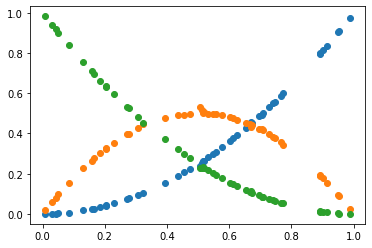

In [2]:
aaRecordF=[]
AaRecordF=[]
AARecordF=[]
freqForaRecord=[]
for repeat in range(50):
    print("############################################################################")
    print("THIS IS REPEAT:", repeat)
    dO=random.randint(1,5)
    dO2=random.randint(1,5)
    if dO>dO2:
        temp=dO2
        dO2=dO
        dO=temp
    crR=random.uniform(0.1,1)
    crR2=random.uniform(0.1,1)
    if crR>crR2:
        temp=crR2
        crR2=crR
        crR=temp
    
    faa,fAa,fAA=simulationMain(alleleDistribution=random.uniform(0,1),malePopSize=random.randint(100,10000), femalePopSize=random.randint(100,10000), minDieOut=dO, maxDieOut=dO2, minCrRate=crR, maxCrRate=crR2, iterationNumber=5, isPlot=False)
    
    #will record the frequency of the pairs here
    aaRecordF.append(faa/(faa+fAa+fAA))
    AaRecordF.append(fAa/(faa+fAa+fAA))
    AARecordF.append(fAA/(faa+fAa+fAA))
    #record the frequency of the single allele here
    freqForaRecord.append((2*faa+fAa)/((faa+fAa+fAA)*2))
    

plt.figure(10)

plt.plot(freqForaRecord,aaRecordF, 'o')
plt.plot(freqForaRecord,AaRecordF, 'o')
plt.plot(freqForaRecord,AARecordF, 'o')
# plt.plot(aaRecordT)
# plt.plot(AaRecordT)
# plt.plot(AARecordT)

plt.show()